# Your First Data Science Project With The Iris DataSet (Special for Beginners)

In [1]:
# Data Analysis and Manipulation
import pandas as pd  # Creating and analyzing DataFrames
import numpy as np   # For numerical computations

# Visualization
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For statistical data visualization

# Data Preprocessing
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler      # To standardize features

# Model selection and classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# To evaluate the model's performance (accuracy, confusion matrix, classification report)


# Dimensionality Reduction
from sklearn.decomposition import PCA 
# Dimension reduction using Principal Component Analysis (PCA)
# Obtaining a lower-dimensional representation by reducing the number of features

# Load the Iris dataset
from sklearn.datasets import load_iris

# Let's configure the default settings for visualization
sns.set(style="whitegrid")                # Set the background of the plots to white
plt.rcParams['figure.figsize'] = (10, 6)  # Set the size of the plots

# Step 1: EDA (Exploratory Data Analysis)


First 5 rows of the data frame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   sp

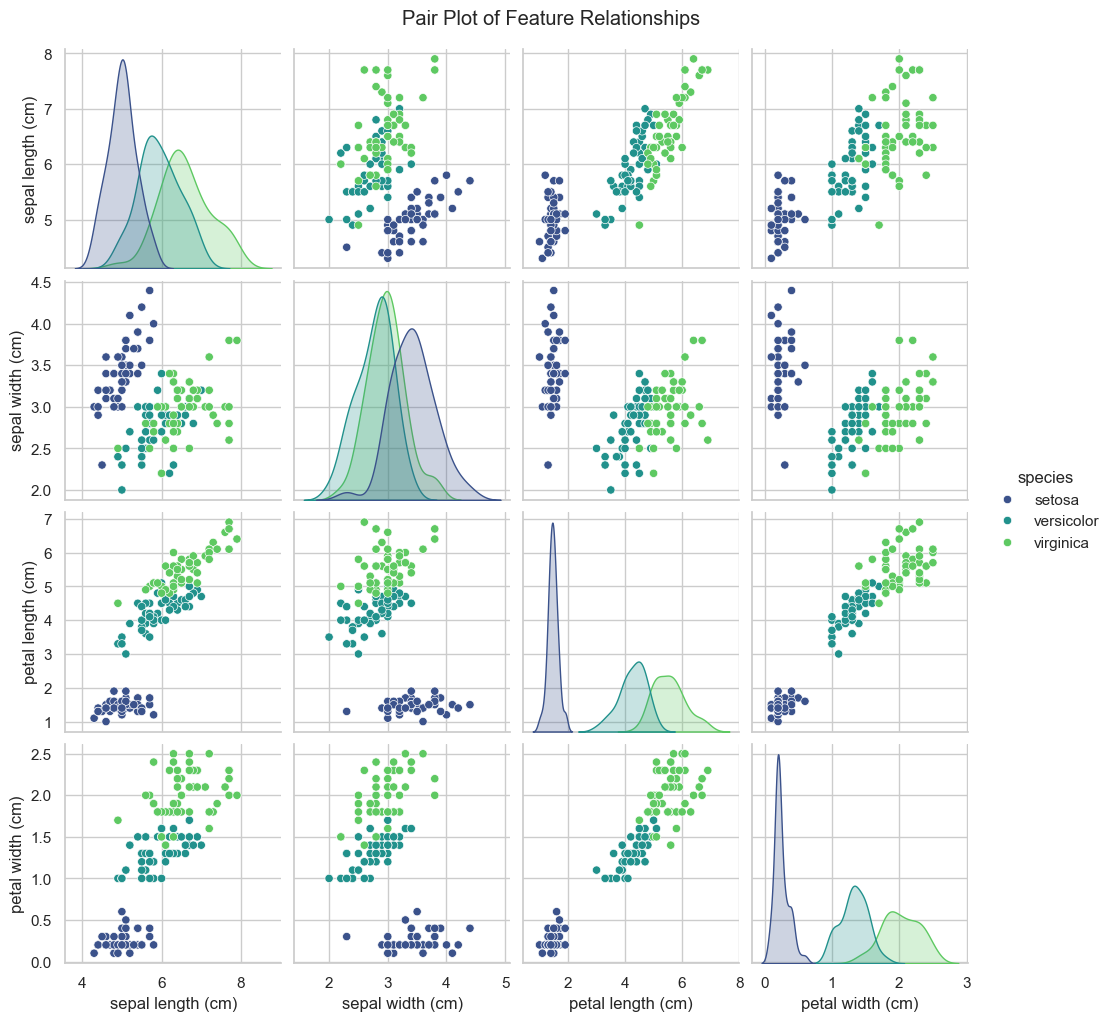

In [2]:
iris_data = load_iris()
# Loads the dataset in sci-kit learn
# iris_data: has a dictionary-like structure (contains information such as data, target, feature names)

df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df['species'] = iris_data.target_names[iris_data.target]
# iris_data.data: Numerical data consisting of 4 features.
# iris_data.feature_names: Column names (e.g., “sepal length (cm)”).
# iris_data.target: Represents species (0, 1, 2).
# iris_data.target_names: Names corresponding to these numerical labels (“setosa”, ‘versicolor’, “virginica”).
# df[‘species’]: Makes the data more readable by converting numerical labels to species names.

print("First 5 rows of the data frame:")
print(df.head())
# Shows the first 5 rows of the data frame.

print("\nDataset Information:")
print(df.info())
# Shows the general information about the DataFrame.

print("Statistical Summary of Numerical Variables:")
print(df.describe())
# Shows the basic statistics of numerical variables.

print("\nPair Plot of Feature Relationships:")
sns.pairplot(df, hue='species', palette='viridis', height=2.5)
plt.suptitle("Pair Plot of Feature Relationships", y=1.02)
plt.show()
# Plots all feature pairs as scatter plots.
# hue='species': color separation by species
# palette='viridis': color palette
# height=2.5: height of each subplot
# suptitle: overall title

# Step 2: Data Preprocessing

In [3]:
print("Number of missing values in each column:")
print(df.isnull().sum())
# Checks if there are any missing (NaN) values in each column.

print("\nNumber of duplicate rows:", df.duplicated().sum())
# Checks for any duplicate rows.

X = df.drop('species', axis=1)
y = df['species']
# X: Independent variables (characteristics) (sepal/petal length/width)
# y: Dependent variable (target) (species: setosa, versicolor, virginica)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Splits the data into training (70%) and testing (30%) sets
# stratify=y: preserves the proportional distribution of species
# random_state=42: a fixed seed for randomness

scaler = StandardScaler()
# Creates a scaler object to standardize features

X_train_scaled = scaler.fit_transform(X_train)
# fit: calculates the mean and standard deviation based on the training data.
# transform: then transforms the data to this scale.

X_test_scaled = scaler.transform(X_test)
# Test data is transformed using the scale learned from the training data.
# fit is not applied to the test data to ensure realistic evaluation of the model.

print("After scaling, the shape of the training data is:", X_train_scaled.shape)
print("The shape of the test data is:", X_test_scaled.shape)
# Shows the sizes of scaled training and test data.

Number of missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Number of duplicate rows: 1
After scaling, the shape of the training data is: (105, 4)
The shape of the test data is: (45, 4)


# Step 3: Modeling

Logistic Regression Accuracy: 0.9111
K-Nearest Neighbors Accuracy: 0.9111
Decision Tree Accuracy: 0.9111
Support Vector Machine Accuracy: 0.9333

Best Model: Support Vector Machine (Accuracy: 0.9333)


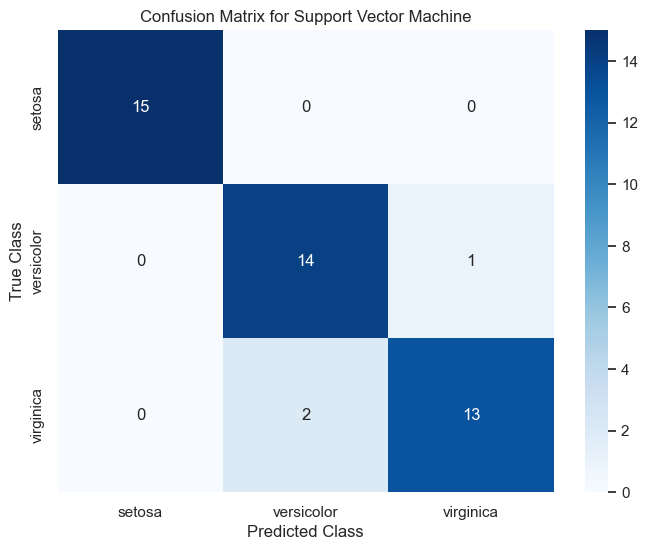


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [4]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', random_state=42)
}
# 4 different classification algorithms are defined in a dictionary
# each model's name is the key, and the model object is the value
# random_state=42: ensures reproducibility of results with fixed randomness
# n_neighbors=5: 5 neighbors are used for KNN
# kernel=‘rbf’: RBF kernel function is used for SVM

results = {}
# A dictionary is created to store the accuracy score of each model

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store the result
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
# Each model is trained (fit) in turn and makes predictions (predict) on the test set
# The correct prediction rate is calculated with accuracy_score
# Results are stored in the results dictionary and printed to the screen

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (Accuracy: {results[best_model_name]:.4f})")
# The name of the model with the highest accuracy is taken from the results dictionary
# This model is selected as best_model and printed to the screen

y_pred_best = best_model.predict(X_test_scaled)
# Predictions are made on the test data using the best model
# These predictions will be used for further analysis

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()
# confusion_matrix: provides a comparison of actual and predicted classes
# heatmap: visually displays classification accuracy
# annot=True: adds numerical values to cells
# fmt=‘d’: displays numerical values in integer format

print(f"\n{best_model_name} Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=iris_data.target_names))
# provides metrics such as precision, recall, and f1-score
# offers separate performance measurements for each class

# Step 4: Visualization



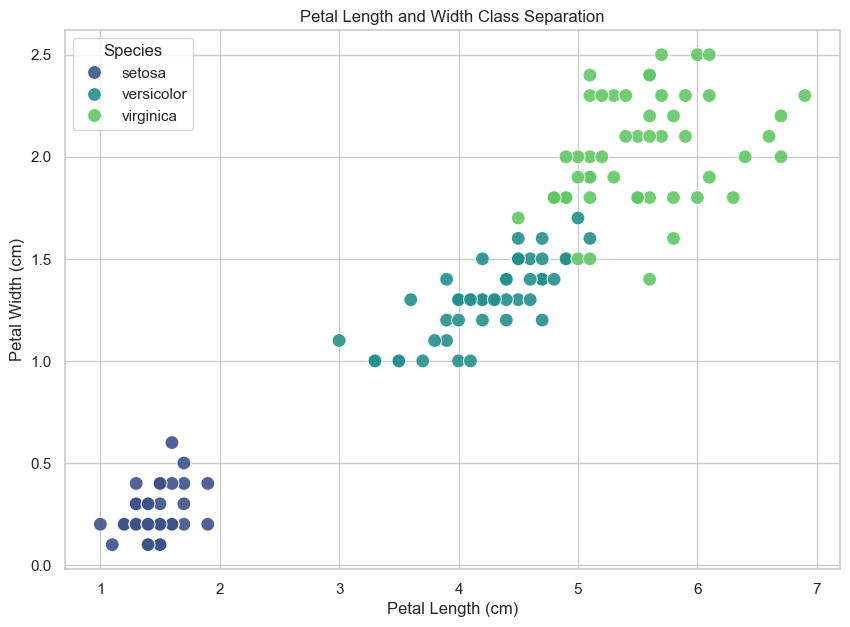

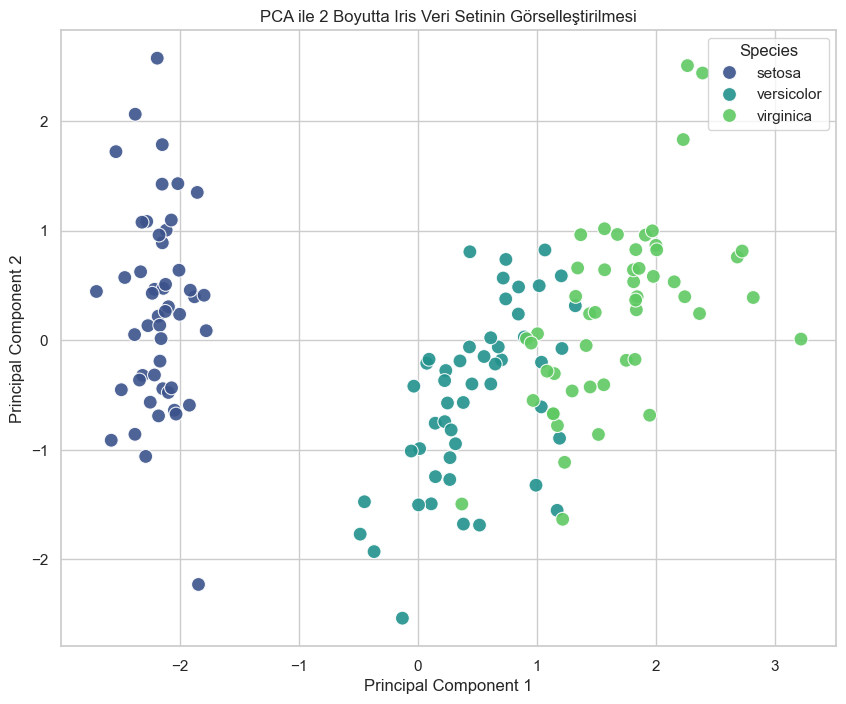

In [5]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, s=100, palette='viridis', alpha=0.9)
# Draws a scatter plot on the petal length and width axes
# hue=‘species’: color-codes by species
# s=100: sets the point size
# palette=‘viridis’: sets the color palette
# alpha=0.9: sets the point transparency level

plt.title('Petal Length and Width Class Separation')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()
# This plot is particularly successful in visually separating the Setosa species from the others.

pca = PCA(n_components=2)
# Creates a PCA (Principal Component Analysis) model
# n_components=2: reduces the data to 2 dimensions

X_scaled_pca = pca.fit_transform(scaler.transform(X)) 
# First, the entire data is scaled (scaler.transform(X))
# Then, PCA is applied (pca.fit_transform)
# Each sample is now represented with 2 components.

pca_df = pd.DataFrame(data=X_scaled_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['species'] = df['species']
# PCA output is converted into a DataFrame
# Species information is added for visualization

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='species', data=pca_df, s=100, palette='viridis', alpha=0.9)
plt.title('PCA ile 2 Boyutta Iris Veri Setinin Görselleştirilmesi')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()
# This plot shows how the data is separated into 2 dimensions using PCA.
# It visually presents how well the classes are separated in the PCA plane.

# Step 5: Outcome Analysis

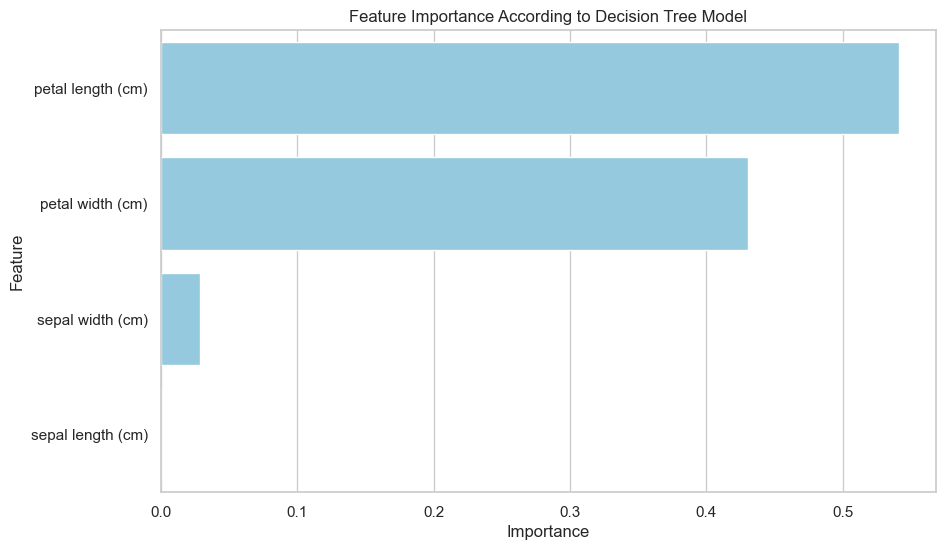

             Feature  Importance
2  petal length (cm)    0.541176
3   petal width (cm)    0.430252
1   sepal width (cm)    0.028571
0  sepal length (cm)    0.000000


In [6]:
dt_model = models["Decision Tree"]
# Selects the Decision Tree model from the defined models

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)
# feature_importances_: Decision Tree model returns the importance score given to each feature
# These scores indicate which features the model gave more weight to in its decision-making process
# pd.DataFrame: Converts the scores and feature names into a DataFrame
# sort_values: Sorts in descending order according to importance scores

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances, color='skyblue')
plt.title('Feature Importance According to Decision Tree Model')
plt.show()

print(importances)
# Visualization and also displays the importance scores in a table